## Decision trees

In [2]:
import pandas as pd

train = pd.read_csv("ed-titanic-training.csv")
test = pd.read_csv("ed-titanic-test.csv")
train["Age"][train["Age"] > 3] = 4
train.drop(columns="Unnamed: 0", inplace=True)
test["Age"][test["Age"] > 3] = 4
titles = {
    "0": "Mr",
    "1": "Master",
    "2": "Mrs",
    "3": "Miss",
    "4": "Rare",
}
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4


<Axes: title={'center': 'Pearson Correlation of Features'}>

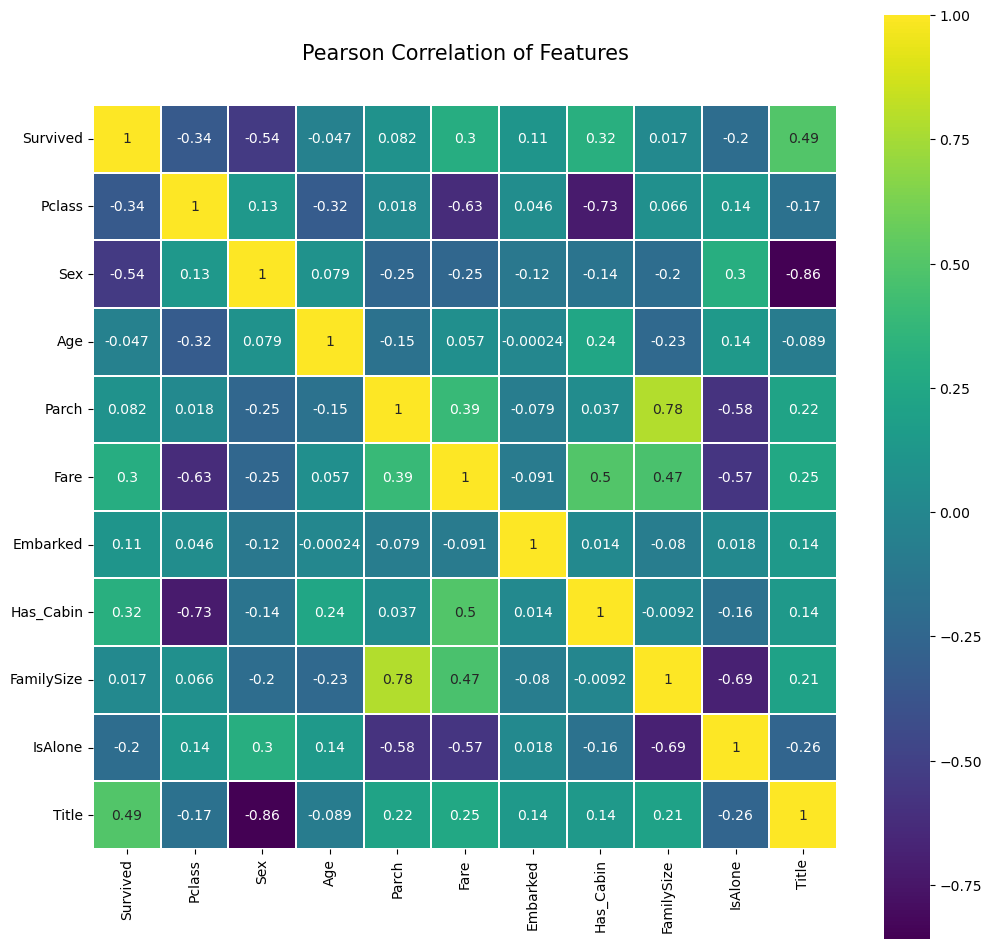

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

### COMMENT
Oczywisty wniosek - Survived koreluje z tytułem, a wyższe wartości tytułów miały osoby z tytułem rzadkow występującym (wojskowi etc.) i kobiety, które ratowano najpierw.

Oprócz tego widać korelację z posiadaniem kabiny i opłatą, ponownie jeśli ktoś posiadał kabinę to większa szansa, że był bogatym, których ratowano najpierw.

In [4]:
surv_by_title = train.groupby('Title')['Survived'].mean()
surv_by_title

Title
1    0.156673
2    0.575000
3    0.793651
4    0.702703
5    0.347826
Name: Survived, dtype: float64

In [5]:
train.iloc[:, 1:]

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,0,2,0,1
1,1,0,2,0,3,1,1,2,0,3
2,3,0,1,0,1,0,0,1,1,4
3,1,0,2,0,3,0,1,2,0,3
4,3,1,2,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,1,0,0,1,1,5
887,1,0,1,0,2,0,1,1,1,4
888,3,0,2,2,2,0,0,4,0,4
889,1,1,1,0,2,1,1,1,1,1


In [6]:
from sklearn import tree
import numpy as np
from sklearn.model_selection import GridSearchCV
# find best depth
parameters = {'criterion':['entropy'], 'max_depth': np.arange(1, 15)}
tree_clf = tree.DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(tree_clf, parameters, cv=10)
clf.fit(train.iloc[:, 1:], train.iloc[:, 0])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [7]:
clf.best_score_, clf.best_params_

(0.8316479400749064, {'criterion': 'entropy', 'max_depth': 3})

In [8]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy")
decision_tree.fit(train.iloc[:, 1:], train.iloc[:, 0])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'Title <= 1.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'Has_Cabin <= 0.5\nentropy = 0.626\nsamples = 517\nvalue = [436, 81]'),
 Text(0.125, 0.375, 'FamilySize <= 3.5\nentropy = 0.502\nsamples = 424\nvalue = [377, 47]'),
 Text(0.0625, 0.125, 'entropy = 0.514\nsamples = 410\nvalue = [363, 47]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.375, 0.375, 'Fare <= 0.5\nentropy = 0.947\nsamples = 93\nvalue = [59, 34]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 85\nvalue = [51, 34]'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nentropy = 0.884\nsamples = 374\nvalue = [113, 261]'),
 Text(0.625, 0.375, 'Title <= 4.5\nentropy = 0.526\nsamples = 202\nvalue = [24, 178]'),
 Text(0.5625, 0.125, 'entropy = 0.288\nsamples = 179\nvalue = [9, 170]'),
 Text(0.6875, 0.125, 'entropy = 0.932\nsamples = 23\nvalue = [15, 8]'),
 Text(0.875, 0.375, 'FamilySize <= 

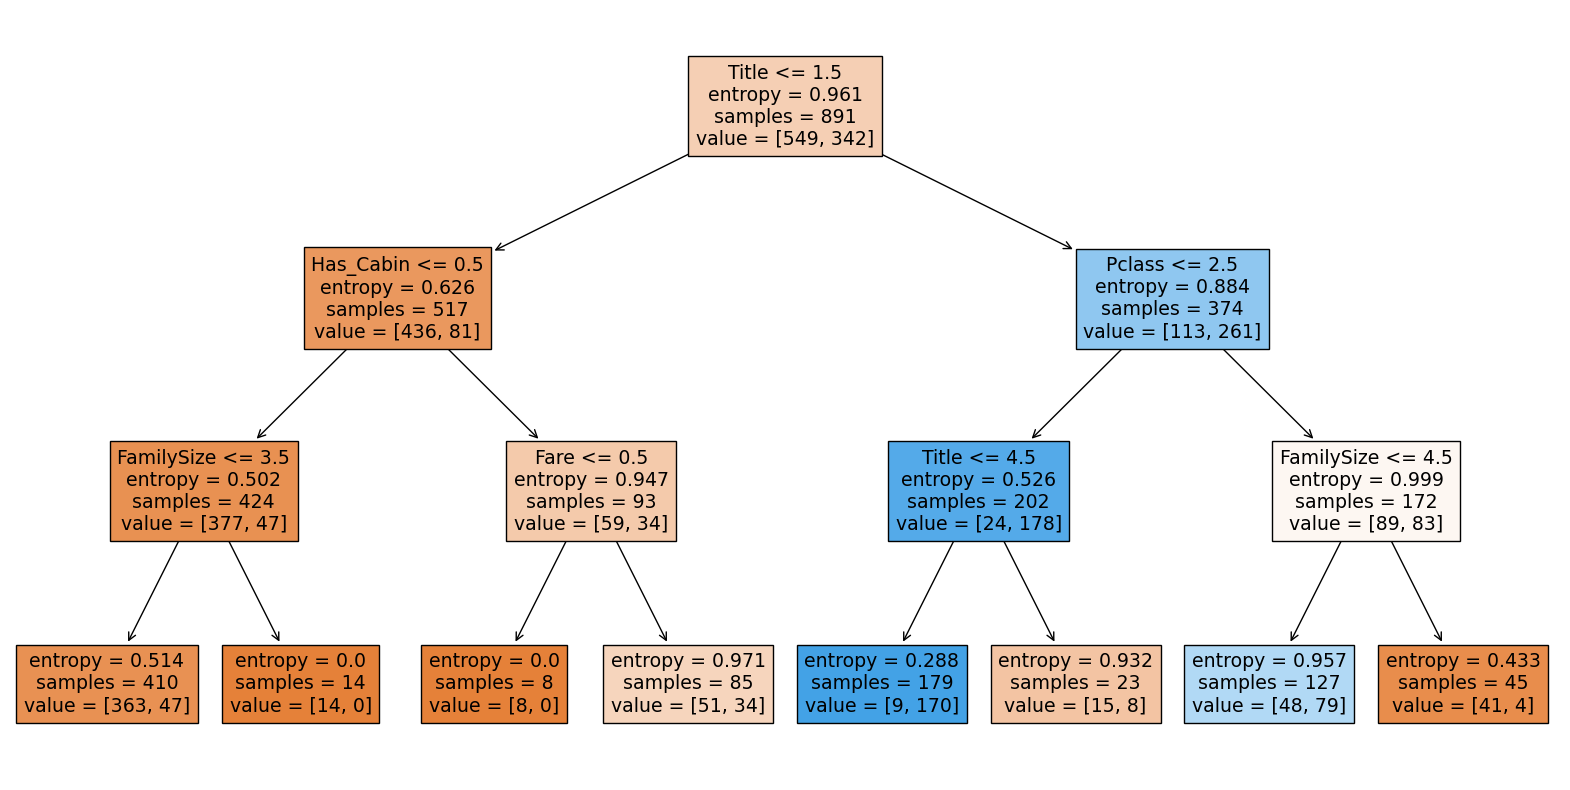

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=train.iloc[:, 1:].columns)

In [10]:
parameters = {'criterion':['entropy', 'gini'], 'max_depth': np.arange(1, 15), 'min_samples_leaf': np.arange(1, 101, 10)}
tree_clf = tree.DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(tree_clf, parameters, cv=10)
clf.fit(train.iloc[:, 1:], train.iloc[:, 0])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])})

In [11]:
clf.cv_results_['mean_test_score'], clf.cv_results_['params']

(array([0.78228464, 0.78228464, 0.78228464, 0.78228464, 0.78228464,
        0.78228464, 0.78228464, 0.78228464, 0.78228464, 0.78228464,
        0.78905119, 0.78905119, 0.78905119, 0.78905119, 0.78905119,
        0.78905119, 0.78905119, 0.78905119, 0.78905119, 0.78905119,
        0.83164794, 0.83164794, 0.82940075, 0.82379526, 0.82267166,
        0.80694132, 0.80696629, 0.8002372 , 0.78905119, 0.78905119,
        0.82153558, 0.81710362, 0.81822722, 0.81817728, 0.81817728,
        0.80694132, 0.80696629, 0.8002372 , 0.78905119, 0.78905119,
        0.82379526, 0.81373283, 0.81486891, 0.81481898, 0.81817728,
        0.80694132, 0.80696629, 0.8002372 , 0.78905119, 0.78905119,
        0.81822722, 0.81596754, 0.8193633 , 0.81481898, 0.81817728,
        0.80694132, 0.80696629, 0.8002372 , 0.78905119, 0.78905119,
        0.80810237, 0.81484395, 0.8193633 , 0.81481898, 0.81817728,
        0.80694132, 0.80696629, 0.8002372 , 0.78905119, 0.78905119,
        0.80925094, 0.81484395, 0.8193633 , 0.81

In [12]:
results_df = pd.DataFrame(clf.cv_results_)

mean_scores_criterion = np.zeros(len(parameters['criterion']))
mean_scores_max_depth = np.zeros(len(parameters['max_depth']))
mean_scores_min_samples_leaf = np.zeros(len(parameters['min_samples_leaf']))

for idx, criterion in enumerate(parameters['criterion']):
    criterion_mask = results_df['param_criterion'] == criterion
    mean_scores_criterion[idx] = results_df.loc[criterion_mask, 'mean_test_score'].mean()

for idx, max_depth in enumerate(parameters['max_depth']):
    depth_mask = results_df['param_max_depth'] == max_depth
    mean_scores_max_depth[idx] = results_df.loc[depth_mask, 'mean_test_score'].mean()

for idx, min_samples_leaf in enumerate(parameters['min_samples_leaf']):
    leaf_mask = results_df['param_min_samples_leaf'] == min_samples_leaf
    mean_scores_min_samples_leaf[idx] = results_df.loc[leaf_mask, 'mean_test_score'].mean()

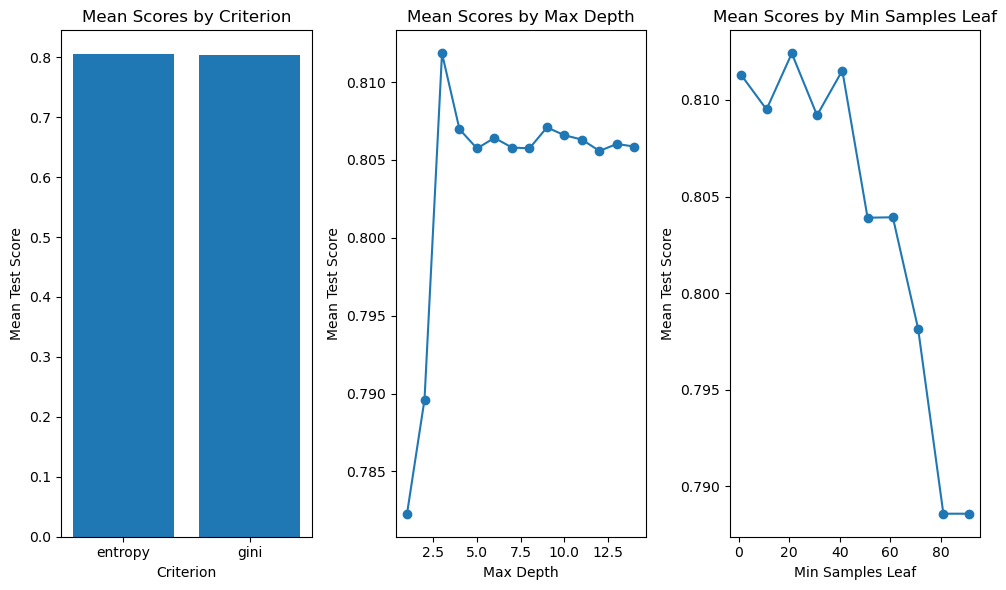

In [13]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(parameters['criterion'], mean_scores_criterion)
plt.title('Mean Scores by Criterion')
plt.xlabel('Criterion')
plt.ylabel('Mean Test Score')

plt.subplot(1, 3, 2)
plt.plot(parameters['max_depth'], mean_scores_max_depth, marker='o')
plt.title('Mean Scores by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')

plt.subplot(1, 3, 3)
plt.plot(parameters['min_samples_leaf'], mean_scores_min_samples_leaf, marker='o')
plt.title('Mean Scores by Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

### COMMENT
Rodzaj kryterium podziału nie wpływa na siłę modelu. Maksymalna głębokość wpływa znacząco i najlepsze wyniki osiągamy dla wartości = 3, dokłądnie tak jak stwierdzono wyżej przy użyciu Grid Search'a. Minimalna liczba liście nie ma specjalnego znaczenia, ale nie może być zbyt duża, najlepiej wypadają wartości z przedziału 0-40

In [14]:
from sklearn.model_selection import train_test_split

X = train.iloc[:, 1:]
y = train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


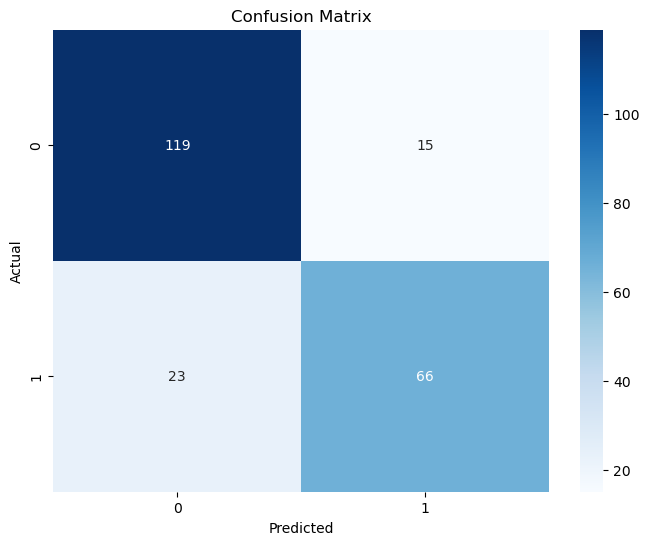

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming clf is your trained model
# Make predictions on the test set
y_pred = clf.best_estimator_.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

average_precision = auc(recall, precision)
print("Average Precision-Recall:", average_precision)

Accuracy: 0.8295964125560538
F1 Score: 0.7764705882352941
Average Precision-Recall: 0.8297634309877975


## kNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

def test_knn(X, y):
    # Reduce dimensionality using PCA
    pca = PCA(n_components=10)
    X_reduced = pca.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Define parameters for grid search
    param_grid = {'n_neighbors': [1, 3, 5, 7], 'metric': ['cityblock', 'euclidean']}

    # Initialize kNN classifier
    knn = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=10)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", best_params)
    print("Best Accuracy:", best_accuracy)

    # Test the model on the test set
    y_pred = grid_search.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)

    return param_grid, grid_search.cv_results_

In [18]:
data = pd.read_csv('nyt-frame.csv')
data.drop(columns="Unnamed: 0", inplace=True)

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

param_grid, cv_results_ = test_knn(X, y)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best Accuracy: 0.8527777777777779
Test Accuracy: 0.8571428571428571


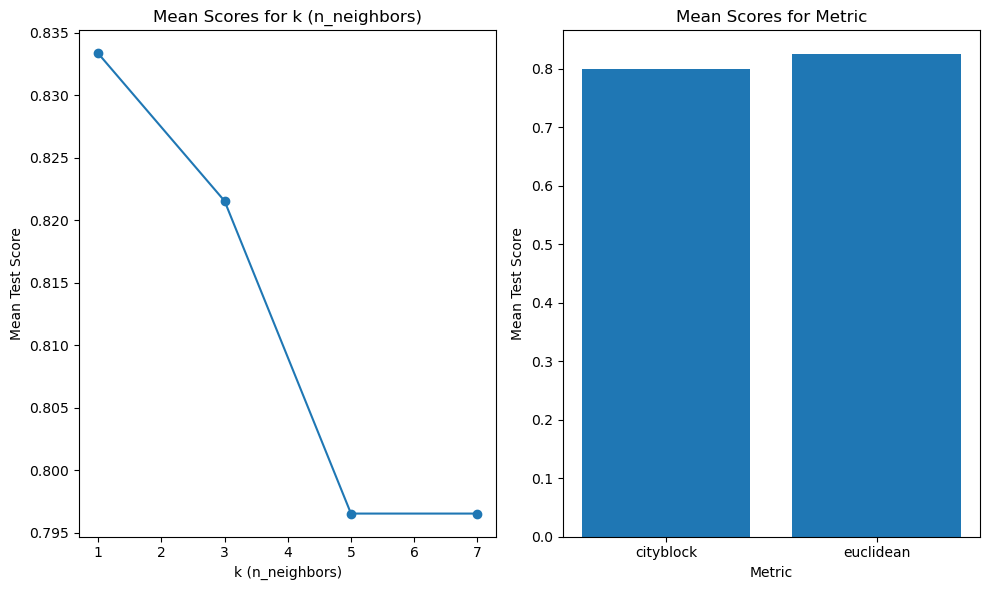

In [19]:
results_df = pd.DataFrame(cv_results_)

# Initialize arrays to store mean scores
mean_scores_neighbors = np.zeros(len(param_grid['n_neighbors']))
mean_scores_metric = np.zeros(len(param_grid['metric']))

# Populate arrays with mean scores
for idx, n_neighbors in enumerate(param_grid['n_neighbors']):
    neighbor_mask = results_df['param_n_neighbors'] == n_neighbors
    mean_scores_neighbors[idx] = results_df.loc[neighbor_mask, 'mean_test_score'].mean()

for idx, metric in enumerate(param_grid['metric']):
    metric_mask = results_df['param_metric'] == metric
    mean_scores_metric[idx] = results_df.loc[metric_mask, 'mean_test_score'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean scores for k (n_neighbors)
plt.subplot(1, 2, 1)
plt.plot(param_grid['n_neighbors'], mean_scores_neighbors, marker='o')
plt.title('Mean Scores for k (n_neighbors)')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Mean Test Score')

# Plot mean scores for metric
plt.subplot(1, 2, 2)
plt.bar(param_grid['metric'], mean_scores_metric)
plt.title('Mean Scores for Metric')
plt.xlabel('Metric')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

### COMMENT
Dla zbioru NYT - metryka odległości nie ma znaczenia, za to liczba sąsiadów ma znaczenie kolosalne, najlepiej działa pojedynczy sąsiad.

In [20]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

param_grid, cv_results_ = test_knn(X, y)

Best Parameters: {'metric': 'cityblock', 'n_neighbors': 3}
Best Accuracy: 0.9405314009661836
Test Accuracy: 0.9210526315789473


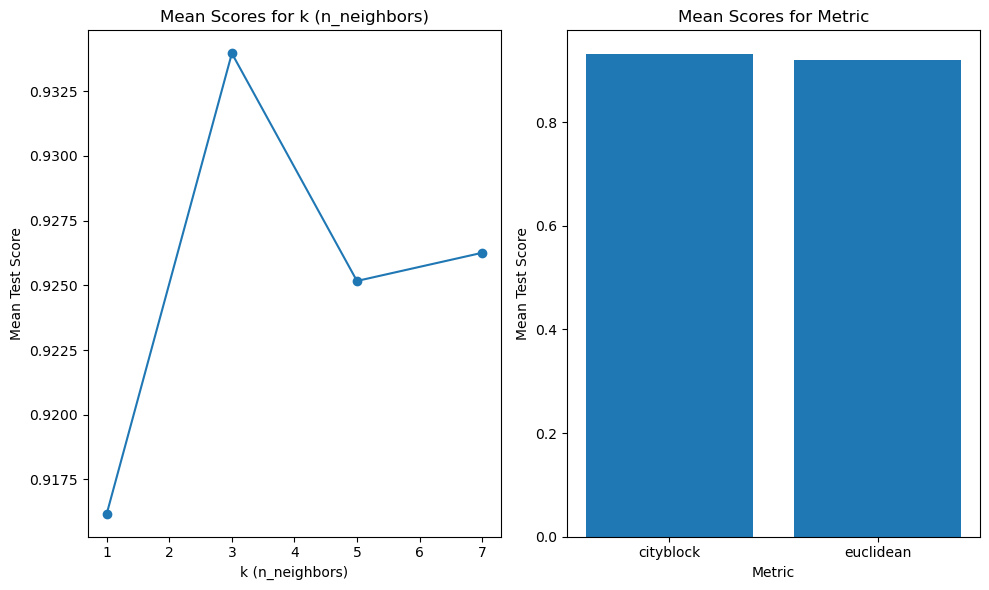

In [21]:
results_df = pd.DataFrame(cv_results_)

# Initialize arrays to store mean scores
mean_scores_neighbors = np.zeros(len(param_grid['n_neighbors']))
mean_scores_metric = np.zeros(len(param_grid['metric']))

# Populate arrays with mean scores
for idx, n_neighbors in enumerate(param_grid['n_neighbors']):
    neighbor_mask = results_df['param_n_neighbors'] == n_neighbors
    mean_scores_neighbors[idx] = results_df.loc[neighbor_mask, 'mean_test_score'].mean()

for idx, metric in enumerate(param_grid['metric']):
    metric_mask = results_df['param_metric'] == metric
    mean_scores_metric[idx] = results_df.loc[metric_mask, 'mean_test_score'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean scores for k (n_neighbors)
plt.subplot(1, 2, 1)
plt.plot(param_grid['n_neighbors'], mean_scores_neighbors, marker='o')
plt.title('Mean Scores for k (n_neighbors)')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Mean Test Score')

# Plot mean scores for metric
plt.subplot(1, 2, 2)
plt.bar(param_grid['metric'], mean_scores_metric)
plt.title('Mean Scores for Metric')
plt.xlabel('Metric')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

### COMMENT
Dla zbioru breast cancer - ponownie, metryka odległości nie ma znaczenia i liczba sąsiadów ma duże znaczenie, ale teraz najlepiej działa trzech sąsiadów.

### KD-Tree
Wykonywałęm projekt opraty o Kd-Tree i Quad tree dwa lata temu w ramach przedmiotu algorytmy geometryczne. Zamieszczam raport i zzipowane repo z tamtego przedmiotu jako osobne pliki.

### Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['entropy', 'gini'], 'max_depth': np.arange(1, 15), 'min_samples_leaf': np.arange(1, 101, 10)}
tree_clf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(tree_clf, parameters, cv=10)
clf.fit(train.iloc[:, 1:], train.iloc[:, 0])

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])})

In [29]:
clf.best_score_

0.8327715355805243

In [23]:
clf.cv_results_['mean_test_score'], clf.cv_results_['params']

(array([0.78456929, 0.78456929, 0.78456929, 0.78456929, 0.78344569,
        0.78344569, 0.78344569, 0.78344569, 0.78344569, 0.78344569,
        0.81706617, 0.81930087, 0.809201  , 0.79796504, 0.79907615,
        0.79570537, 0.79570537, 0.79570537, 0.79682896, 0.79907615,
        0.82379526, 0.82379526, 0.82043695, 0.81706617, 0.80133583,
        0.79796504, 0.79571785, 0.79571785, 0.79682896, 0.79795256,
        0.82941323, 0.82380774, 0.82156055, 0.82043695, 0.8125593 ,
        0.79684145, 0.79796504, 0.79459426, 0.79682896, 0.79795256,
        0.83277154, 0.82604245, 0.82156055, 0.81931336, 0.8080774 ,
        0.79684145, 0.79796504, 0.79459426, 0.79682896, 0.79795256,
        0.82044944, 0.82717853, 0.82156055, 0.81931336, 0.8080774 ,
        0.79684145, 0.79796504, 0.79459426, 0.79682896, 0.79795256,
        0.82382022, 0.82044944, 0.81820225, 0.81931336, 0.8080774 ,
        0.79684145, 0.79796504, 0.79459426, 0.79682896, 0.79795256,
        0.81483146, 0.81820225, 0.81932584, 0.81

In [24]:
results_df = pd.DataFrame(clf.cv_results_)

mean_scores_criterion = np.zeros(len(parameters['criterion']))
mean_scores_max_depth = np.zeros(len(parameters['max_depth']))
mean_scores_min_samples_leaf = np.zeros(len(parameters['min_samples_leaf']))

for idx, criterion in enumerate(parameters['criterion']):
    criterion_mask = results_df['param_criterion'] == criterion
    mean_scores_criterion[idx] = results_df.loc[criterion_mask, 'mean_test_score'].mean()

for idx, max_depth in enumerate(parameters['max_depth']):
    depth_mask = results_df['param_max_depth'] == max_depth
    mean_scores_max_depth[idx] = results_df.loc[depth_mask, 'mean_test_score'].mean()

for idx, min_samples_leaf in enumerate(parameters['min_samples_leaf']):
    leaf_mask = results_df['param_min_samples_leaf'] == min_samples_leaf
    mean_scores_min_samples_leaf[idx] = results_df.loc[leaf_mask, 'mean_test_score'].mean()

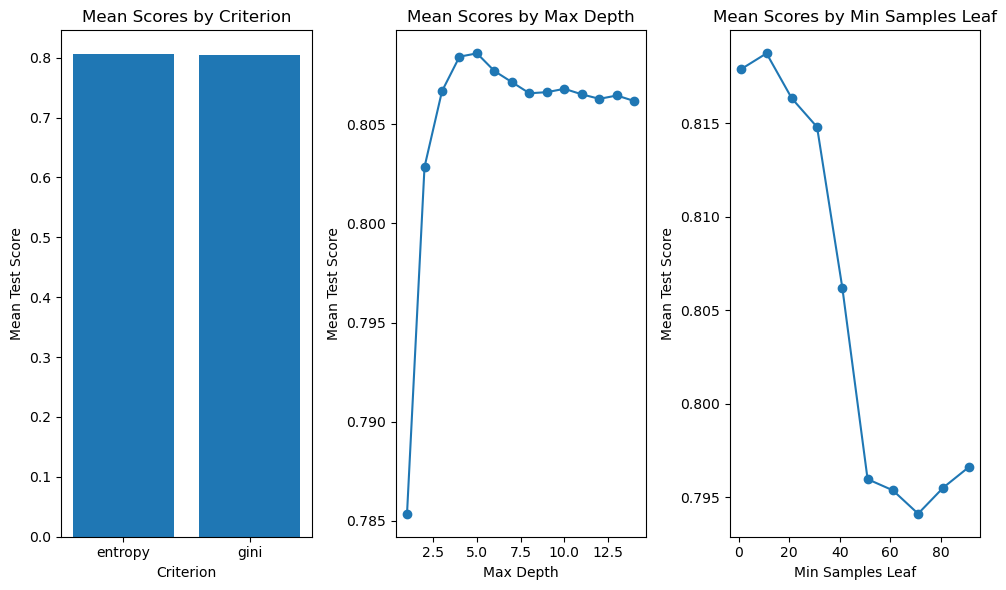

In [25]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(parameters['criterion'], mean_scores_criterion)
plt.title('Mean Scores by Criterion')
plt.xlabel('Criterion')
plt.ylabel('Mean Test Score')

plt.subplot(1, 3, 2)
plt.plot(parameters['max_depth'], mean_scores_max_depth, marker='o')
plt.title('Mean Scores by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')

plt.subplot(1, 3, 3)
plt.plot(parameters['min_samples_leaf'], mean_scores_min_samples_leaf, marker='o')
plt.title('Mean Scores by Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = train.iloc[:, 1:]
y = train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


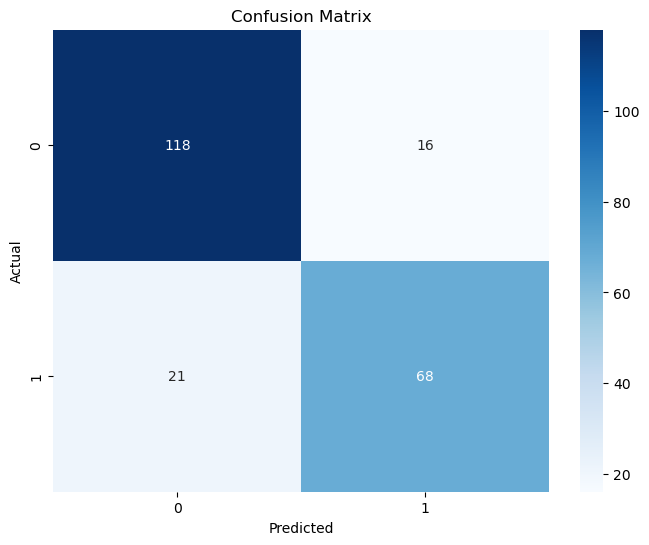

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming clf is your trained model
# Make predictions on the test set
y_pred = clf.best_estimator_.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

average_precision = auc(recall, precision)
print("Average Precision-Recall:", average_precision)

Accuracy: 0.8340807174887892
F1 Score: 0.7861271676300579
Average Precision-Recall: 0.8338695784657392


### COMMENT
Wyniki bardzo podobne jak w przypadku pojedynczych drzew. Accuracy udało się poprawić o niecałe pół pp. (82.9% v 83.3%)

### Random Forest for Breast Cancer dataset

In [35]:
from sklearn.pipeline import Pipeline


def test_rf(X, y):
    pca = PCA()
    rf = RandomForestClassifier()
    pipe = Pipeline(steps=[("pca", pca), ("rf", rf)])

    param_grid = {
        "pca__n_components": [5, 15, 30, 45, 60],
        "rf__max_depth": np.arange(1, 15),
        'rf__min_samples_leaf': np.arange(1, 101, 10)
    }

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipe, param_grid, cv=10)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", best_params)
    print("Best Accuracy:", best_accuracy)

    # Test the model on the test set
    y_pred = grid_search.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)

    return param_grid, grid_search.cv_results_

In [36]:
X, y = load_breast_cancer(return_X_y=True)

param_grid, cv_results_ = test_rf(X, y)

/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2800 fits failed out of a total of 7000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transf

Best Parameters: {'pca__n_components': 5, 'rf__max_depth': 12, 'rf__min_samples_leaf': 1}
Best Accuracy: 0.9581642512077295
Test Accuracy: 0.9736842105263158


In [52]:
results_df = pd.DataFrame(cv_results_)
parameters = param_grid

mean_scores_criterion = np.zeros(len(parameters['pca__n_components']))
mean_scores_max_depth = np.zeros(len(parameters['rf__max_depth']))
mean_scores_min_samples_leaf = np.zeros(len(parameters['rf__min_samples_leaf']))

for idx, criterion in enumerate(parameters['pca__n_components']):
    criterion_mask = results_df['param_pca__n_components'] == criterion
    mean_scores_criterion[idx] = results_df.loc[criterion_mask, 'mean_test_score'].mean()

for idx, max_depth in enumerate(parameters['rf__max_depth']):
    depth_mask = results_df['param_rf__max_depth'] == max_depth
    mean_scores_max_depth[idx] = results_df.loc[depth_mask, 'mean_test_score'].mean()

for idx, min_samples_leaf in enumerate(parameters['rf__min_samples_leaf']):
    leaf_mask = results_df['param_rf__min_samples_leaf'] == min_samples_leaf
    mean_scores_min_samples_leaf[idx] = results_df.loc[leaf_mask, 'mean_test_score'].mean()

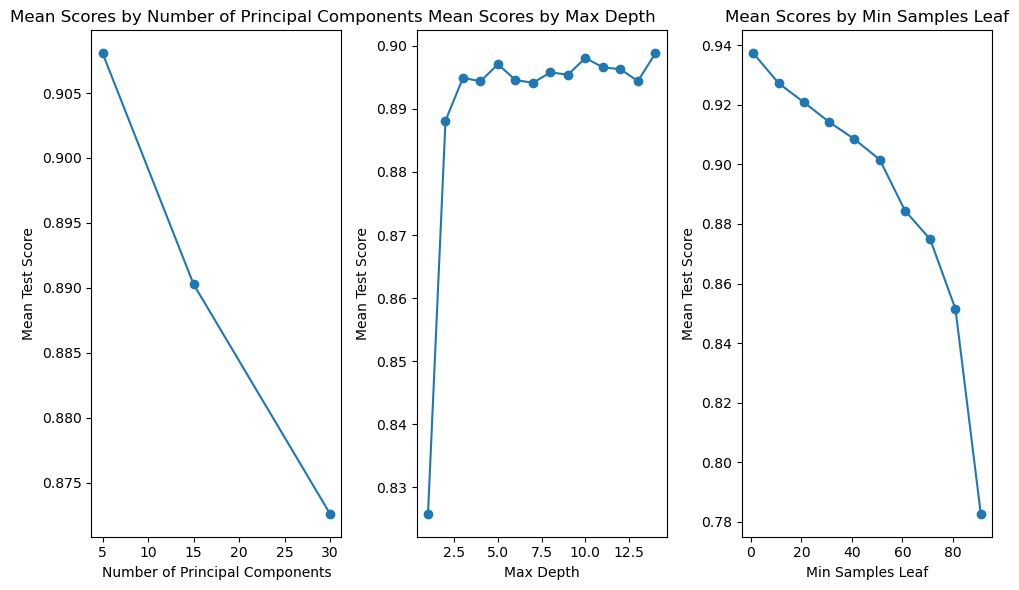

In [54]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.plot(parameters['pca__n_components'], mean_scores_criterion, marker='o')
plt.title('Mean Scores by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Test Score')

plt.subplot(1, 3, 2)
plt.plot(parameters['rf__max_depth'], mean_scores_max_depth, marker='o')
plt.title('Mean Scores by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')

plt.subplot(1, 3, 3)
plt.plot(parameters['rf__min_samples_leaf'], mean_scores_min_samples_leaf, marker='o')
plt.title('Mean Scores by Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

### Comment
Na zbiorze testowym wypadamy lepiej niż na uczącym! Notujemy też poprawkę kilku pp. nad klasyfikatorem kNN. Najlepszą liczbą głównych składowych z PCA okazało się 5 i jak widać ma to dość spore znaczenie na ostateczny wynik. Głębokość i minimalna liczba próbek w liściu bez zmian jeśli chodzi o kształt krzywych.